

# Welcome to the world of full-stack observability—a fancy term for understanding how well your apps are doing. 🚀

Meet New Relic, your go-to tool for keeping an eye on your apps. It's like having a superpower that lets you see everything that's happening.

In this article, we'll break down the basics of New Relic's full-stack observability. From checking what's going on behind the scenes to making sure your users are happy, we'll cover it all in simple terms.


**Prerequisites:**

Before we dive in, there are a couple of things you'll need to have:

1. **Sign Up for New Relic:** If you haven't already, head over to the New Relic website and sign up for an account. It's quick and easy, and you'll gain access to all of New Relic's powerful observability tools.

2. **Get Your License Key:** Once you've signed up, you'll receive a license key. This key is like your ticket to the New Relic party—it allows you to start monitoring your applications and collecting valuable data.


```
License Key: <license-key>
```

That's it! With your New Relic account and license key in hand, you're ready to start monitoring and optimizing your applications like a pro.

You can also follow the easiest way to instrument new relic with guided installation with aswell. Follow this to Instrument your application with the APM agent:  https://developer.newrelic.com/collect-data/monitor-your-application/install-apm/

**New Relic Profiles:**

In New Relic, managing privacy and access levels is made easy through the use of profiles. Similar to AWS accounts, you can create multiple profiles tailored to different users or teams within your organization. Each profile comes with its own set of keys and functionalities, ensuring granular control over access and permissions:

* **API Key:** Each profile is assigned a unique API key, allowing users to interact
with New Relic's APIs and access specific data and functionalities based on their role or responsibilities.

* **License Key:** With a dedicated license key for each profile, you can track usage and manage resources more efficiently. This ensures that each profile operates within its allocated limits and maintains compliance with licensing agreements.

* **Account ID:** Every profile is associated with its own account ID, providing a distinct identifier for billing, reporting, and administrative purposes. This separation of accounts enables clear delineation between different teams or business units within your organization.

By leveraging New Relic profiles, you can streamline access management, enhance data privacy, and empower teams to effectively monitor and optimize their applications according to their unique requirements.

Follow the steps below to setup a new profile 😀

In [ ]:
newrelic profiles add --profile NewRelicDash --apiKey <license-key>

In [ ]:
newrelic profiles -h

In [ ]:
newrelic profiles default --profile NewRelicDash

# Connecting New Relic to Python Backend API

In this guide, I'll walk you through the process of integrating New Relic with a Python backend API using Flask. We'll be deploying a fresh Flask application—a library app, to be specific—where users can add and display their books. With New Relic, we'll gain valuable insights into the performance of our API, enabling us to optimize its efficiency and deliver exceptional user experiences.

Let's dive in and unleash the power of New Relic in our Python backend!


**Brief Walkthrough of the basic Web app on Flask: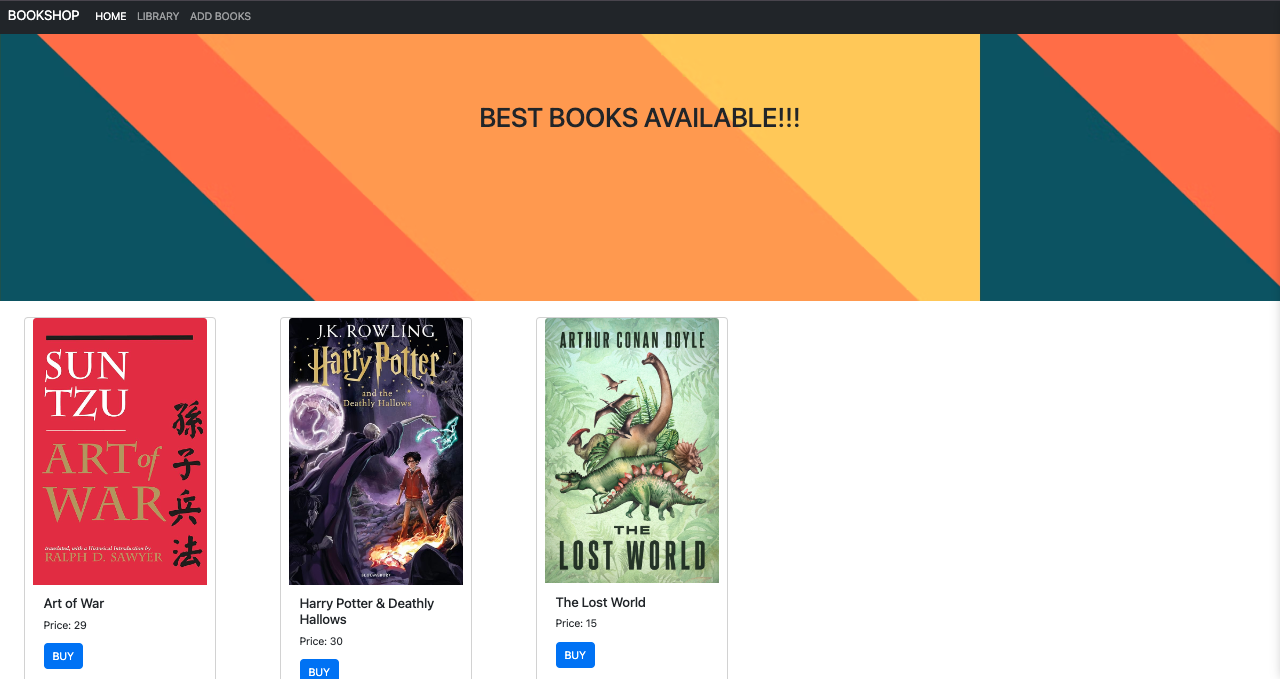**

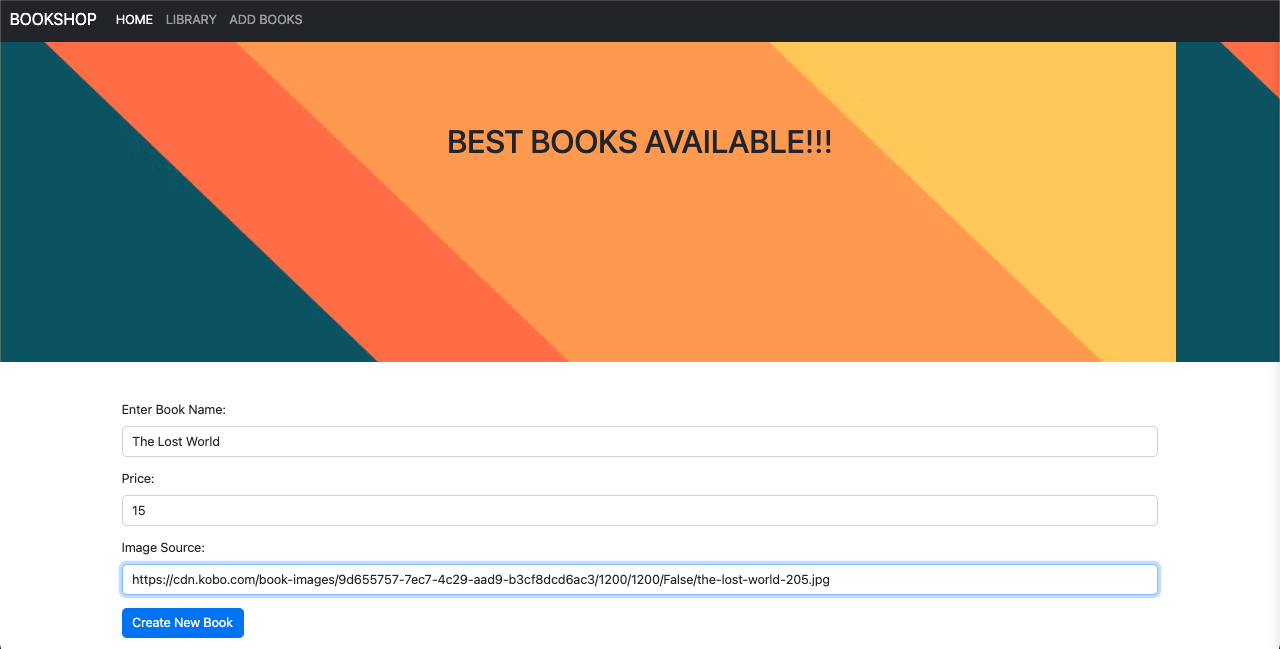

**Let us start the Integration with installing New Relic CLI:**

In [ ]:
pip3 install newrelic

In [ ]:
pip3 show newrelic
# check if the package location is added to Path or env variable.
# if not please follow below steps rather surfing stackofeverflow for the issue. ;)

In [ ]:
echo $PATH

In [ ]:
export PATH=$PATH:/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages

In [ ]:
export PATH=$PATH:/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/newrelic

Agent configuration Python:
To seamlessly integrate New Relic's monitoring capabilities into your Python applications, we'll need to configure the Python agent. This process involves creating a `newrelic.ini file` and specifying the settings relevant to your environment.

Below are the common settings that apply to all environments:


`Create file name: *newrelic.ini*`

Below are the common settings that apply to all environments:

```
# newrelic.ini

# License key provided by New Relic
license_key = <license-key>

# Application name displayed in the New Relic UI
app_name = Your Application Name

# Log level for agent messages (INFO, DEBUG, etc.)
log_level = info

# Log file location for agent messages
log_file = /path/to/newrelic.log

# Agent version to use
# version = x.x.x

# Enable/disable SSL encryption for data transmission
ssl = true


```

Replace `<license-key> ` with your actual New Relic license key, and specify your desired application name. Additionally, you can customize the log level, log file location, agent version, and SSL encryption settings as needed.

For further details on advanced configuration options and environment-specific settings, refer to the [official documentation.](https://docs.newrelic.com/docs/apm/agents/python-agent/configuration/python-agent-configuration/
)






**Alternatives:**

Alternatively, you can streamline the integration process using the New Relic CLI. Here's how:

* Generate Agent Configuration:
Use the newrelic-admin command-line tool to generate the agent configuration file with your license key.

* Validate Configuration:
Ensure the agent configuration is valid and test the connection to the New Relic data collector service:



In [ ]:
# Alternatively you can also Generate the agent configuration file with your license key using nrewrelic cli

$ newrelic-admin generate-config $YOUR_LICENSE_KEY newrelic.ini

# Validate the agent configuration and test the connection to new relic data collector service.
$ newrelic-admin validate-config newrelic.ini

**Integrate with Your Web Application:**

If you control how your web application or WSGI server is started, consider using the newrelic-admin wrapper script for integration. Modify your existing startup script to include newrelic-admin run-program, and set the NEW_RELIC_CONFIG_FILE environment variable to the name of the configuration file you created above.

In [ ]:
# Integrate the agent with your web application.

# If you control how your web application or WSGI server is started, the recommended way to integrate the agent is to use the newrelic-admin wrapper script.
# Modify the existing startup script, prefixing the existing startup command and options with newrelic-admin run-program.

# Also, set the NEW_RELIC_CONFIG_FILE environment variable to the name of the configuration file you created above:

$ NEW_RELIC_CONFIG_FILE=newrelic.ini newrelic-admin run-program $YOUR_COMMAND_OPTIONS

# Other Examples:
$ NEW_RELIC_CONFIG_FILE=newrelic.ini newrelic-admin run-program gunicorn -c config.py test_site.wsgi
$ NEW_RELIC_CONFIG_FILE=newrelic.ini newrelic-admin run-program uwsgi uwsgi_config.ini

**In our case it is quite basic:**

In [ ]:
NEW_RELIC_CONFIG_FILE=newrelic.ini newrelic-admin run-program python3 app.py


Great the metrics are starting to appear now & we can start monitoring our Bookstore Application

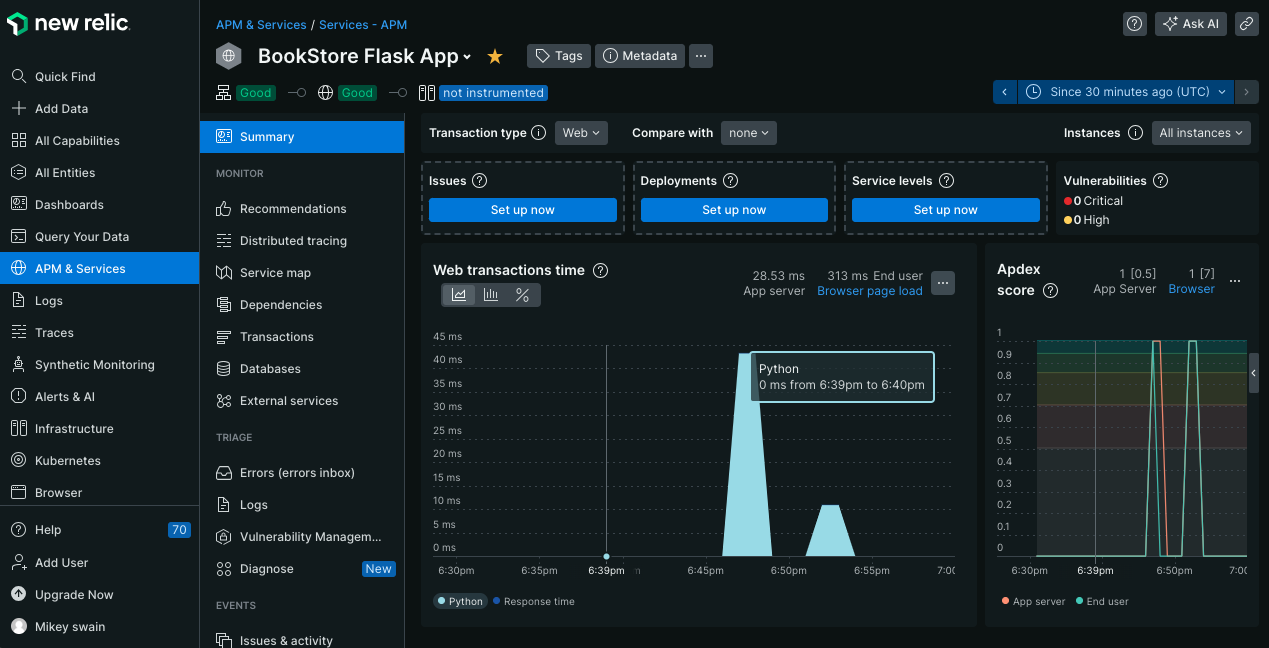

**Newrelic Tags:**

New Relic tags offer a powerful way to organize and analyze your monitoring data with precision and context. By attaching tags to entities such as applications, hosts, services, and more, you gain the ability to categorize and filter your data based on custom attributes such as environment, version, region, or any other relevant metadata. This granular level of organization enables you to segment your data dynamically, allowing for targeted analysis and troubleshooting. With tags, you can easily identify trends, isolate performance issues, and optimize resources across your entire infrastructure.

**Newrelic Entities:**

New Relic entities serve as the fundamental components of your monitoring landscape, offering a concise yet comprehensive view of your digital environment. These entities encompass diverse elements such as applications, servers, databases, and more, encapsulating critical performance data and insights. With entities, you can swiftly pinpoint issues, track trends, and optimize resources to ensure seamless operations. By leveraging entity-level data, New Relic empowers you to make informed decisions, proactively address challenges, and enhance the overall performance and reliability of your applications and infrastructure.

* To find an entity's GUID and other metadata in the UI: from any list of entities, click an entity's  icon, and click See metadata & tags.
Every entity has a New Relic-specific ID number, which is reported as the attribute entityGuid


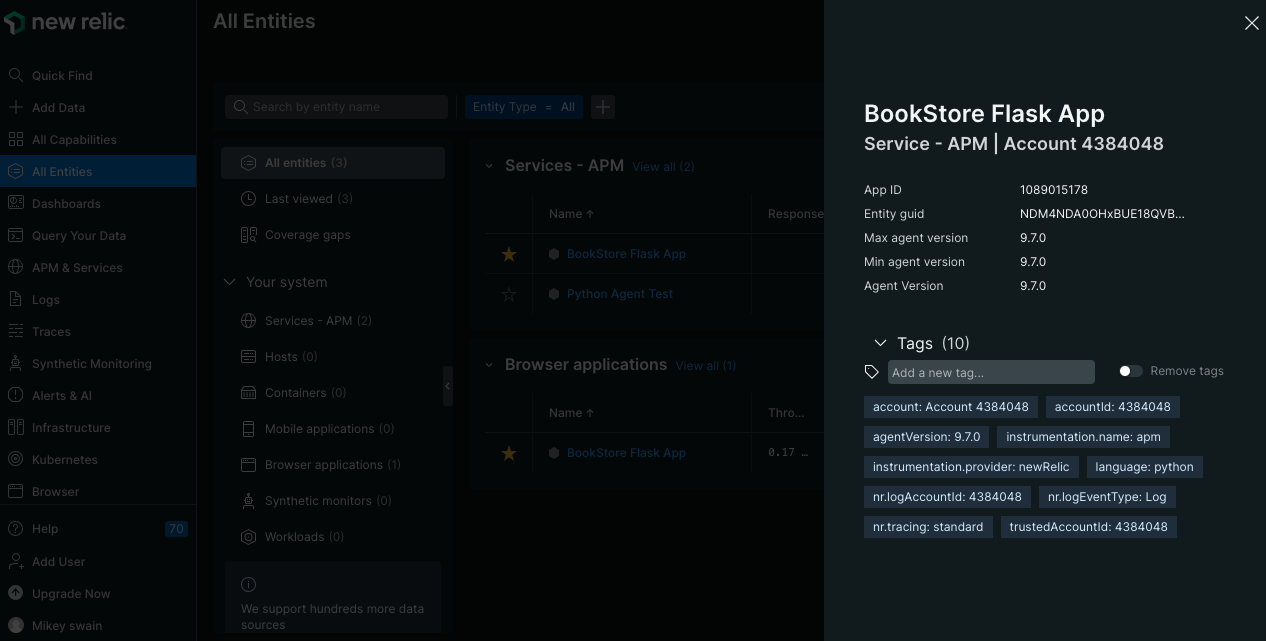

In [ ]:
# To retrieve entity tags using the New Relic CLI with a specific GUID, you can use the following command:

newrelic entity tags get -g NDM4NDA0OHxBUE18QVBQTElDQVRJT058MTA4OTAxNTE3OA

# This command will fetch the tags associated with the entity identified by the provided GUID.
# Please make sure to replace NDM4NDA0OHxBUE18QVBQTElDQVRJT058MTA4OTAxNTE3OA with the actual GUID of the entity you want to retrieve tags for.

In [ ]:
newrelic entity tags create -g NDM4NDA0OHxBUE18QVBQTElDQVRJT058MTA4OTAxNTE3OA -t app:myfirstappmonitoring

**Distributed Tracing:**

Imagine distributed tracing as a journey map for your app's requests. It all starts with the root entity, which is like the starting point on this map. From there, every step of the request's path is tracked through different entities. Think of it like following a trail of breadcrumbs from the browser to your service. Along the way, each entity reacts in its own way, shaping how the request flows. It's like unraveling a mystery, where each clue leads you closer to understanding your app's performance and behavior.

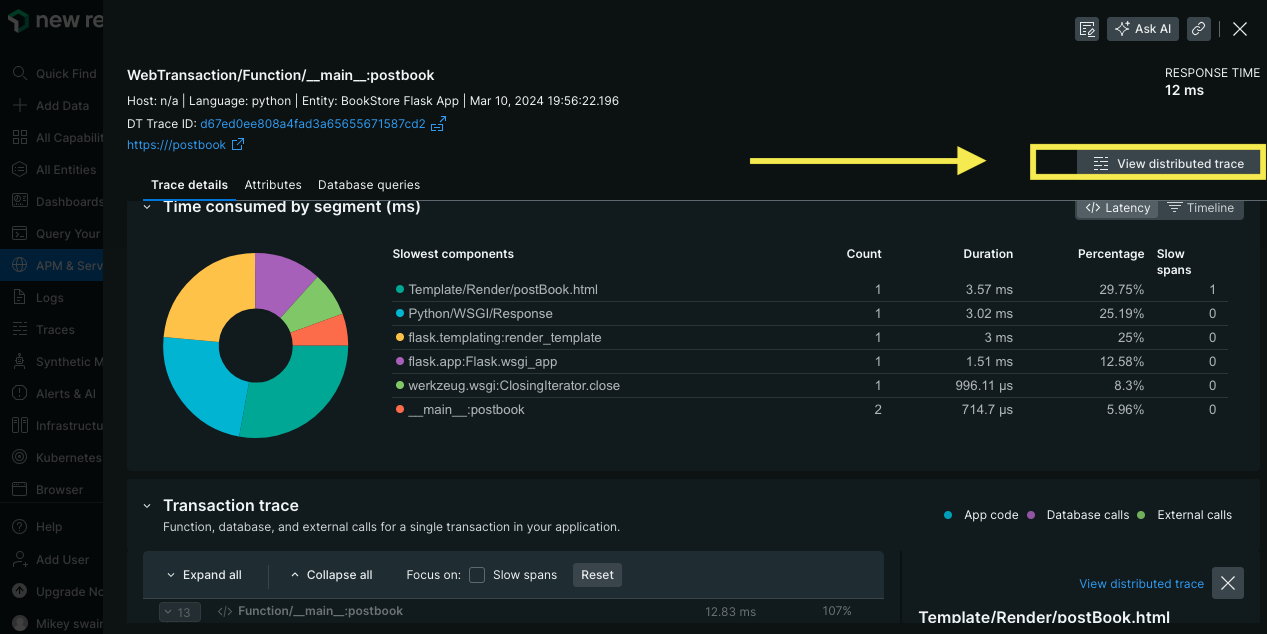

# **Apdex:**

In the realm of Application Performance Monitoring (APM), the Apdex score is king. Short for Application Performance Index, Apdex serves as a guiding beacon in the complex world of application performance.

Put simply, Apdex measures how often users feel happy or unhappy with our application. It's like a happiness gauge for your app. A perfect score of 1 means users are overjoyed, while a score of 0 spells trouble.

**Apdex Score:**

The Apdex score, a critical metric in the APM & Services Dashboard, is calculated using the following formula:

```
Apdex = [Satisfied requests + (Tolerating requests/2)] / Total number of requests
```


Here's a breakdown of each component:

* Satisfied requests: The number of requests with response times equal to or less than the threshold (T).
* Tolerating requests: The number of requests with response times greater than the threshold (T) but less than or equal to four times the threshold (4*T).
* Total number of requests: The sum of satisfied, tolerating, and frustrated requests.

The **threshold (T)** is a crucial parameter in the formula. It determines the cutoff point for categorizing requests as satisfied, tolerating, or frustrated. Any request with a response time greater than the threshold is considered tolerating, while a response time equal to or less than four times the threshold is considered frustrated.

By applying this formula and adjusting the threshold parameter, organizations can gain valuable insights into user satisfaction levels and make informed decisions to optimize application performance and enhance the user experience.

In [ ]:
# To manipulate Apdex threshold
For Apdex > APM & Services > Entity / Application > Settings> Edit Apdex T.

**Navigate to APM & Services:** Navigate to the "APM & Services" section. This section is typically accessible from the main dashboard or navigation menu.

**Select Your Application:** Within the APM & Services section, locate and select the application for which you want to set up the Apdex score. This could be your web application, mobile app, or any other application you're monitoring with New Relic.

**Access Application Settings:** Once you've selected the desired application, look for the settings or configuration options related to Apdex. These settings are typically found within the application's dashboard or settings menu.

**Configure Apdex Threshold:** In the Apdex settings, you'll find options to configure the Apdex threshold. This threshold represents the maximum acceptable response time for user interactions with your application. Set the threshold value based on your application's performance goals and user expectations and save changes.

**Monitor Apdex Score:** With the Apdex threshold set up, New Relic will begin calculating the Apdex score for your application based on real-time performance data. Monitor the Apdex score regularly to gauge the overall user satisfaction with your application and identify any performance issues that may arise.

**Error Rate & User Impact:**

The error rate metric provides valuable insights into the health of your application by indicating the frequency of errors encountered by users. A high error rate could signal underlying issues within your application that need immediate attention, as it directly impacts the user experience. By monitoring the error rate closely, you can proactively identify and address any issues to minimize disruptions and ensure a smooth user experience.

Additionally, understanding the user impact of errors is crucial for prioritizing remediation efforts. Not all errors have the same impact on users some may be minor inconveniences, while others could result in critical functionality failures. By assessing the user impact of errors, you can prioritize troubleshooting and resolution efforts to address the most impactful issues first, thereby enhancing user satisfaction and retention.

**Transactions:**

Transactions provide a detailed view of the performance of individual transactions within your application. By analyzing transaction data, you can identify which transactions are consuming the most time and resources, as well as those that are less time-consuming. This insight enables you to prioritize optimization efforts and allocate resources effectively to improve the overall performance of your application.

Transactions that are consistently time-consuming may indicate areas of inefficiency or bottlenecks within your application code or infrastructure. By addressing these performance issues, you can optimize transaction processing times and enhance the overall responsiveness of your application.

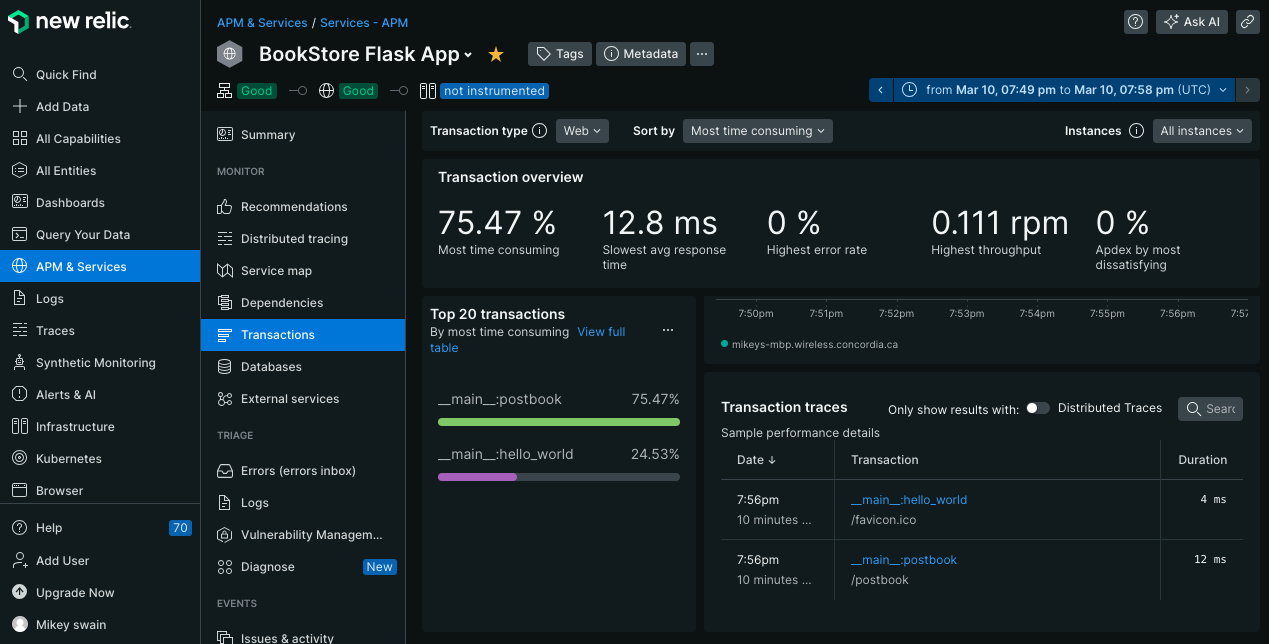


**Databases: Query Time and Database Drivers:**

* In the database dashboard, you'll find valuable insights into the performance of your databases, including metrics like query time and database drivers. Query time measures the duration it takes for database queries to execute, providing crucial information about the efficiency and responsiveness of your database operations. By monitoring query time closely, you can identify slow-performing queries and optimize them to improve overall database performance.

* Additionally, database drivers play a vital role in facilitating communication between your application and the database. Monitoring database drivers allows you to track their performance and identify any issues that may be impacting the reliability or efficiency of database interactions. By staying informed about the performance of database drivers, you can ensure smooth and reliable database operations for your application.

**Error Inbox:**

* Every service within New Relic has its own error inbox, providing a centralized location for managing and resolving errors specific to that service. The error inbox aggregates error occurrences and categorizes them based on various criteria, making it easy to prioritize and address issues efficiently.

* Errors in the error inbox can be pinned for quick access and reference, ensuring that critical issues remain visible and actionable. When an error is resolved, it can be marked as such within the error inbox, helping teams track the status of ongoing investigations and remediation efforts.

* It provides detailed information about each error, including exception logs and other relevant details. By clicking on an error, you can access a precise and comprehensive report that provides insights into the root cause of the error and facilitates troubleshooting and resolution. With access to detailed error information, teams can quickly diagnose and address issues, minimizing downtime and optimizing application performance.


**Profiling with New Relic:**

When it comes to identifying inefficiencies or areas for optimization within your codebase, profiling is the go-to solution. New Relic offers robust profiling capabilities that allow you to gain deep insights into the performance of your application code.

 `To enable profiling in New Relic, you'll first need to configure the `newrelic.ini` file by setting `profile_trace = true`. This simple step activates profiling functionality within your New Relic agent.`

* Once profiling is enabled, you can specify the duration and instances for profiling sessions. This flexibility allows you to tailor profiling to your specific needs, whether you're analyzing short bursts of activity or extended periods of usage.

* after that you can initiate profiling sessions to gather data on code execution and performance. During profiling, New Relic captures detailed information about the execution time of each function within your codebase.

After the profiling session is complete, you can access the results within the New Relic dashboard. By clicking on the name of your application, you'll be presented with a comprehensive breakdown of which pieces of code consume the most execution time. This granular insight enables you to pinpoint areas of inefficiency or bottlenecks within your codebase and prioritize optimization efforts accordingly.

* New Relic allows you to export profiling data for further analysis or sharing with team members. This export functionality ensures that you can leverage profiling insights in various ways to drive improvements and enhance the performance of your application.



In [ ]:
!jupyter nbconvert --to html new_relic\ \(1\).ipynb

[NbConvertApp] Converting notebook new_relic (1).ipynb to html
[NbConvertApp] Writing 2181363 bytes to new_relic (1).html
